**Name**: Ofir Nesher

**Student ID**: 204502926

**Date**: 12/03/2022

<hr>

##### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, chisquared, t, and F distributions

#### Due: 03/22/2022 by 18:30

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}$

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>

## Problem 1 (Making a Model)
A project management team want to model the number of two types of users, called type $A$ and type $B$, over time. The model they want to use has the overall number of users growing linearly over time. At time $t=0$ (not necessarily the website launching date) the linear model should have expected number of users equal in the two groups. At time $t=100$, they introduce a new feature. They think this could change the slope at time $t=100$ but only for users of type $A$ (it changes the *slope*, hence would not put a jump discontinuity into the expected number of users).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientistis/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$s and $y$s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<u>**Answer**</u>:<br>
We want to compare 2 user groups: type $A$ & type $B$.
We encode users of type $A$ as `1` and users of type $B$ as `0`, and apply the "extra effect" only for $A$.
We incorporate the type variable by adding a dummy variable:
$$
x_1 = \begin{cases}
1 & if A \\
0 & if B
\end{cases}
$$
Since at time $t = 100$ the coefficient representing the relationship between time and NumberOfUsers **changes** for users of type $A$ we can add another predictor $(\texttt{x} - t)_+$ where $z_+ := max(x - t, 0) = (x-t)*x_1$  which applies the effect only for users of type $A$.

The new model is therefore:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 x + \beta_2(x - t)x_1
$$
This is a linear model with predictors $z_i = (1, x, (x - t)* x_1$). $\beta_2$ corresponds to the "extra effect" of users of type A at time t=100.

If the intervention did not do anything, $x_1$ would be `0` and $(x - t)x_1$ would be `0` as well.
<hr>

## Problem 2 (Linearization trick in Sinusiodal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \sin\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?
2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?
3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are a function of $(\beta_0, \beta_1', \beta_2')$. Find this function.

<u>**Answer**</u>:<br>
1. This model is **NOT** linear because $\beta_1$ is dependent on a function of $\beta_2$ - as seen at the end of lecture 1.
2. This model is **indeed** linear because $\beta_1$ and $\beta_2$ are independent.
3. https://stats.stackexchange.com/questions/60500/how-to-find-a-good-fit-for-semi-sinusoidal-model-in-r
use this post

<hr>

## Problem 3 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outliers, mark and remove those; explain your logic. 
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def q1(x):
    """
    Compute the 25-th (1st quartile) percentile of the vector x
    """
    return pd.Series.quantile(x, .25)

def q3(x):
    """
    Compute the 75-th (3rd quartile) percentile of the vector x
    """
    return pd.Series.quantile(x, .75)
    
def iqr(x):
    return q3(x) - q1(x)

def rng(x):
    return x.max() - x.min()

In [4]:
# read the data and filter some results
data = pd.read_csv('lecture 1/winequality-red.csv', delimiter=';')
data = data.filter(['density', 'alcohol', 'pH', 'volatile acidity', 'quality']) # we only consider these columns
aggs = data.agg(['mean', 'var', 'median', q1, q3, iqr, rng])
aggs

,density,alcohol,pH,volatile acidity,quality
mean,0.996747,10.422983,3.311113,0.527821,5.636023
var,0.000004,1.135647,0.023835,0.032062,0.652168
median,0.996750,10.200000,3.310000,0.520000,6.000000
q1,0.995600,9.500000,3.210000,0.390000,5.000000
q3,0.997835,11.100000,3.400000,0.640000,6.000000
iqr,0.002235,1.600000,0.190000,0.250000,1.000000
rng,0.013620,6.500000,1.270000,1.460000,5.000000


#### Correlation Matrix
When we wish to explore the correlation among many attributes, it is useful to display a heatmap of the correlation matrix: a matrix in which the $i,j$-th cell indicates $\rho(x_i,x_j)$

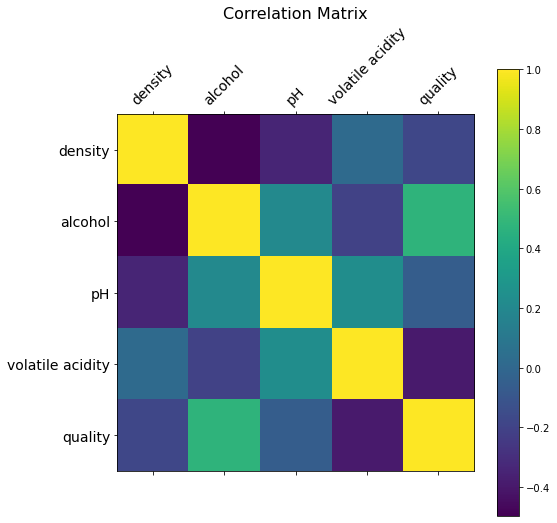

In [5]:
f = plt.figure(figsize=(8, 8))
plt.matshow(data.corr(), fignum=f.number)
numeric_cols = data.select_dtypes(['number'])
plt.xticks(range(numeric_cols.shape[1]), numeric_cols.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_cols.shape[1]), numeric_cols.columns, fontsize=14)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

From the correlation matrix, we see that `volatile acidity` and `alcohol` are the most (negatively and positively) correlated variables with the target variable.

#### Outliers detection using Boxplots

In [6]:
def plot_box_plots(df):
    df.filter(['density']).plot.box()
    df.filter(['alcohol']).plot.box()
    df.filter(['pH']).plot.box()
    df.filter(['volatile acidity']).plot.box()
    df.filter(['quality']).plot.box()
    plt.show()

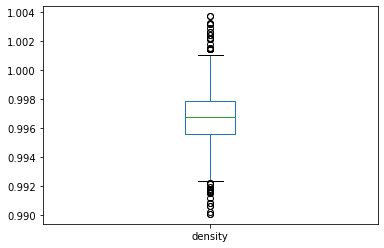

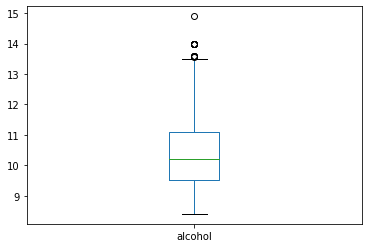

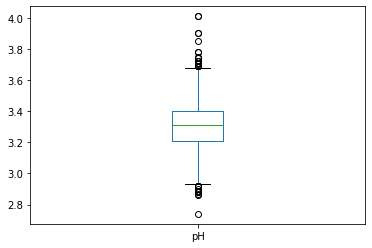

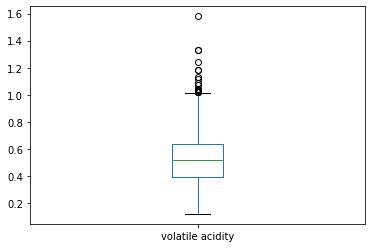

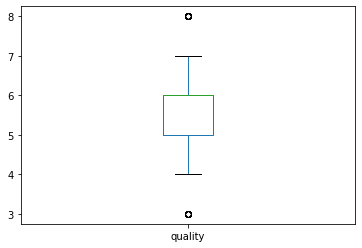

In [7]:
plot_box_plots(data)

Typically an observation is an outlier if it is either less than $Q1 - 1.5$ IQR or greater than $Q3 + 1.5$ IQR, where IQR is the inter-quartile range defined as $Q3 - Q1$. This rule is conservative and often too many points are identified as outliers. Hence we take the <u>**less-conservative**</u> approach where only those points outside of $[Q1 - 3, Q3+3] \times IQR$ are only identified as outliers.

In [8]:
"""
Thanks to G4G:
https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr
"""

# Removing outliers
def remove_outliers(data, col):
    q3 = q3(data[col])
    q1 = q1(data[col])
    iqr = q3 - q1

    print(f"IQR value for column {col} is: {iqr}")
    global outlier_free_list
    global filtered_data

    lower_range = q1 - 3 * iqr
    upper_range = q3 + 3 * iqr
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in data.columns:
    if i == data.columns[0]:
        remove_outliers(data, i)
    else:
        remove_outliers(filtered_data, i)

print(f'Removing {data.shape[0] - filtered_data.shape[0]} rows')
data = filtered_data

IQR value for column density is: 0.002234999999999987
IQR value for column alcohol is: 1.5999999999999996
IQR value for column pH is: 0.18999999999999995
IQR value for column volatile acidity is: 0.25
IQR value for column quality is: 1.0
Removing 3 rows


In [9]:
data.shape

(1596, 5)

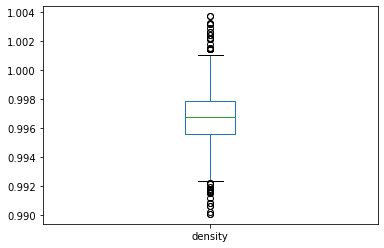

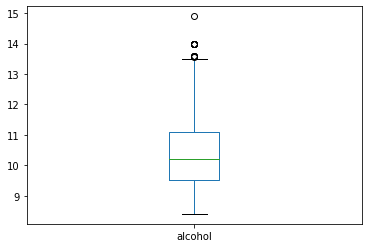

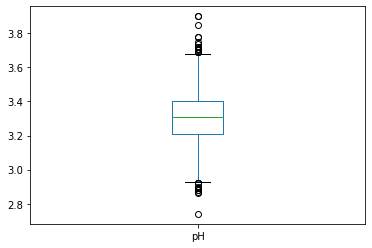

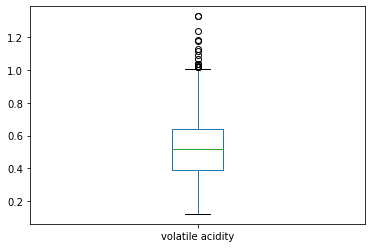

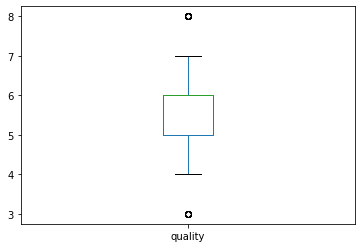

In [10]:
plot_box_plots(data)

#### Pairs Plot/Scatterplot Matrix
Displaying more than two variables on a single scatterplot is not possible. Scatterplot matrix is one possible visualization of three or more continuous variables taken two at a time.

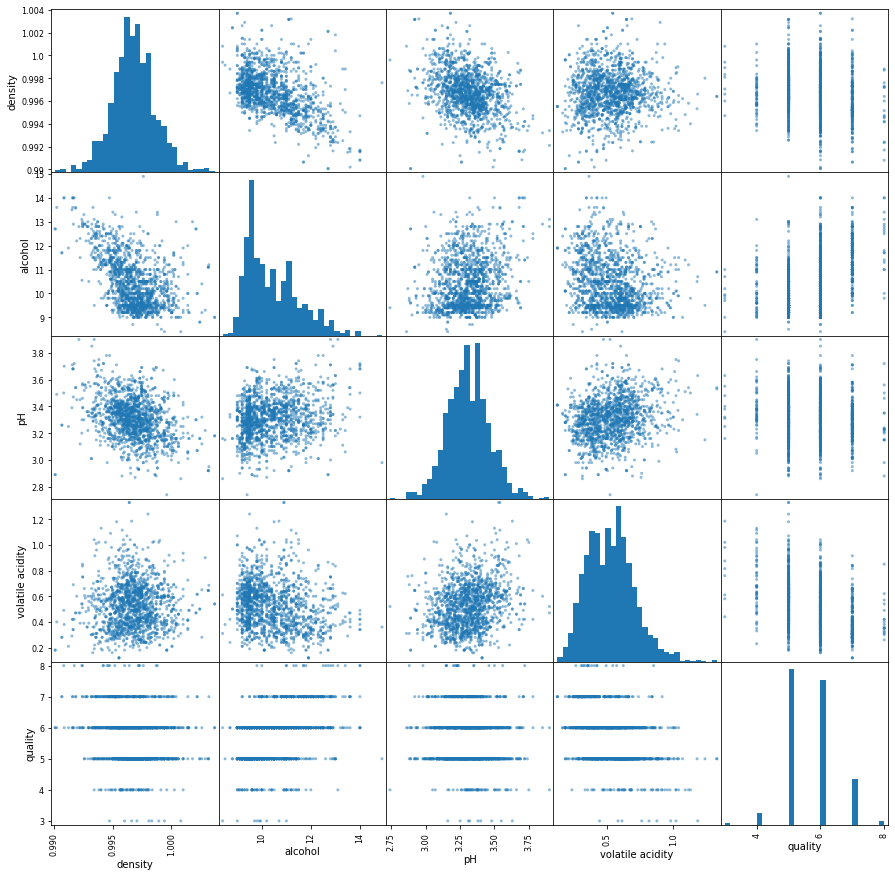

In [11]:
plt.rcParams['figure.figsize'] = [15, 15]
pd.plotting.scatter_matrix(data, hist_kwds={'bins':30})
plt.show()

<hr>

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
2. Plot the response values $y$ and the fitted response $\hat{y} = Z^\top \hat{\beta}$
3. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
4. Write code that verifies:
 - $H = H^\top$ 
 - $H^2 = H$
 - $(I-H)^2 = I-H$
 - $\hat{\epsilon}^\top y = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition

In [12]:
data = pd.read_csv('lecture 1/winequality-red.csv', delimiter=';')
data = data.filter(['density', 'alcohol', 'pH', 'volatile acidity', 'quality']) # we only consider these columns

x = data.filter(['density', 'alcohol', 'pH', 'volatile acidity'])
x0 = data.iloc[:, 0].values
x1 = data.iloc[:, 1].values
x2 = data.iloc[:, 2].values
x3 = data.iloc[:, 3].values
y = data.iloc[:, -1].values

Z = np.column_stack((np.ones_like(y) , x0, x1, x2, x3))
A = np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)
beta_hat = np.dot(A, y)
y_hat = np.dot(Z, beta_hat)

print("beta_hat = ", beta_hat)

beta_hat =  [-8.12904556 12.21377107  0.33962346 -0.38494867 -1.2774203 ]


First entry is the constant term (`1`s), and every other beta corresponds to the predictor in the original DataFrame ('density', 'alcohol', 'pH', 'volatile acidity').

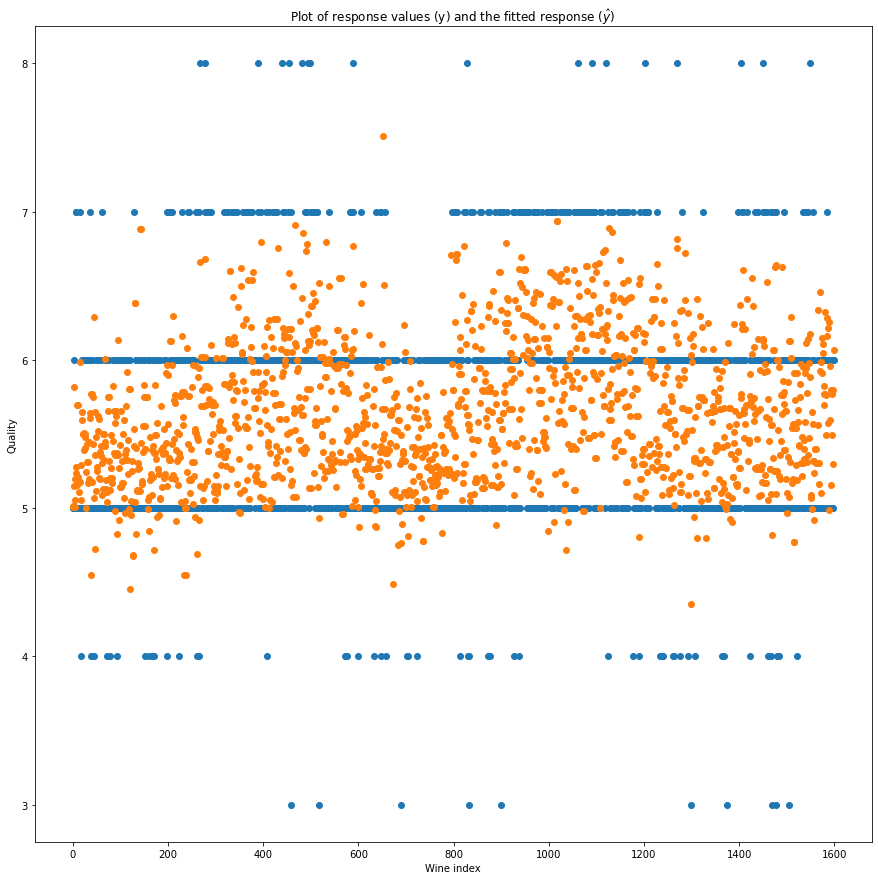

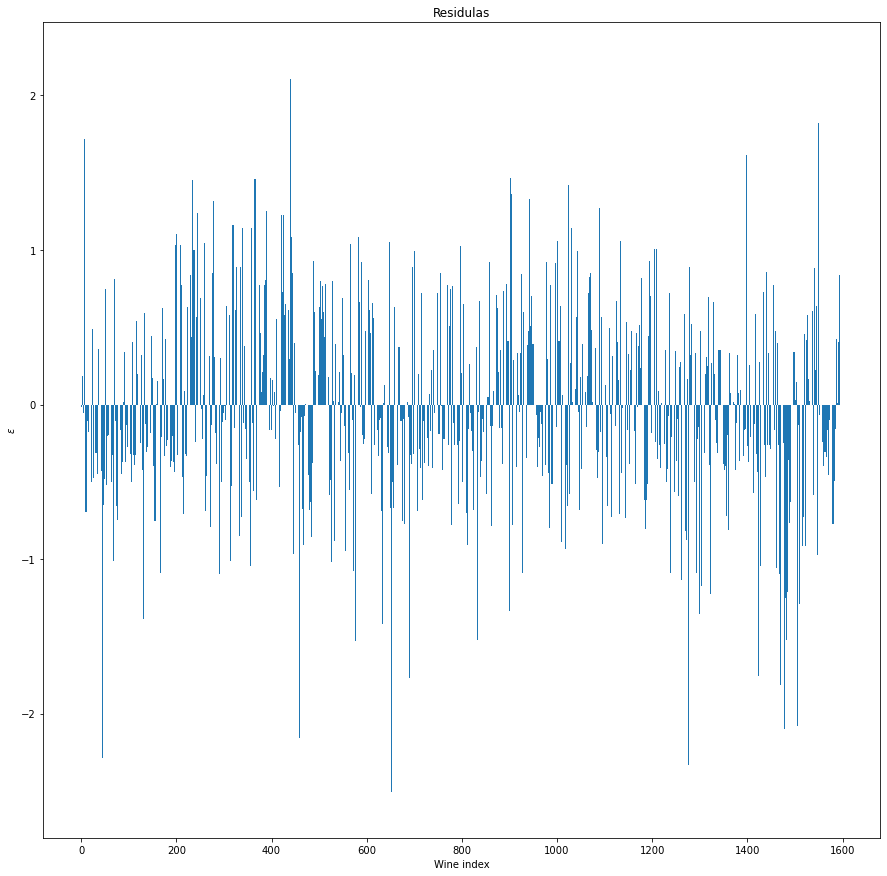

The average of this vector is -5.068336594693419e-10


In [13]:
# 2. Plot the response values y and the fitted response 𝑦̂ =𝑍⊤𝛽̂
xx = x.index.values

plt.scatter(xx, y)
plt.scatter(xx, y_hat)
plt.xlabel('Wine index')
plt.ylabel('Quality')
plt.title("Plot of response values (y) and the fitted response ($\hat{y}$)")
plt.show()

# 3. Illustrate the histogram of the residual vector 𝜖̂; what is the average of this vector?
e = y - y_hat
plt.bar(xx, e)
plt.xlabel('Wine index')
plt.ylabel('$\epsilon$')
plt.title("Residulas")
plt.show()

print(f'The average of this vector is {e.mean()}')

In [14]:
from numpy import linalg as LA
from math import isclose
from IPython.display import display, Math


H = np.dot(Z, A)
print(f'H.shape == {H.shape}')

print(f'Symmetric (H == H.T): {np.testing.assert_almost_equal(H, H.T) == None}')

I = np.identity(H.shape[0])
print(f'(I-H)^2 == I-H: {np.testing.assert_almost_equal(np.square(np.subtract(I, H)), np.subtract(I, H), decimal=1) == None}')

e_hat = np.subtract(y, np.dot(Z, beta_hat))
print(f'e_hat.T * y == 0: {np.testing.assert_almost_equal(np.dot(e_hat.T, Z), 0, decimal=1) == None}')

eig_H, _ = LA.eigh(H)
display(Math(r"\lambda_i(H) \in \{0,1\} :"))
print(all(list(isclose(i, 0) or isclose(i, 1) for i in np.unique(list(round(i) for i in eig_H)))))

print(f'||y||^2 == ||e_hat||^2 + ||y_hat||^2: {np.testing.assert_almost_equal(np.square(LA.norm(y)), np.square(LA.norm(e_hat)) + np.square(LA.norm(y_hat)), decimal=1) == None}')

SS_Tot = np.sum((y - y.mean())**2)
SS_Fit = np.sum((y_hat - y.mean())**2)
SS_Res = np.sum((y - y_hat)**2)
print(f'SS_Tot == SS_Fit + SS_Res: {np.testing.assert_almost_equal(SS_Tot, (SS_Fit + SS_Res)) == None}')

H.shape == (1599, 1599)
Symmetric (H == H.T): True
(I-H)^2 == I-H: True
e_hat.T * y == 0: True


<IPython.core.display.Math object>

True
||y||^2 == ||e_hat||^2 + ||y_hat||^2: True
SS_Tot == SS_Fit + SS_Res: True


<hr>

$\newcommand{\var}{\mathrm{Var}}$
## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the contribution of each coordinate to the loss function. For example, this may be because not all measuremetns are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize 
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W),
$$
where $W = \diag(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 

1. Write the corresponding normal equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$. 
3. What is the hat matrix? make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix.

<hr>

$\newcommand{\var}{\mathrm{Var}}$
## Problem 6 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following excerise, you can only sample using repeated calls to ``random.random()``. 
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with the number of bins between 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretic distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed. 

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike. 
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly. 
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [191]:
import random
from scipy.stats import norm
import numpy as np


def sample_unif(n: int) -> float:  # should be -> List[float]
    """
    return n independent samples from the uniform distribution over (0,1)
    """
    return [random.random() for _ in range(n)]


def sample_normal_clt(n: int) -> float:
    """
    Approximately sample from the standard normal distribution using the CLT 
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Returns:
    -------
    :z:    random sample approximately from the standard normal distribution
    """
    
    # YOUR CODE HERE
    # TODO: how to use n?
    # return np.exp(-np.square(random.random()) / 2) / np.sqrt(2 * np.pi)
    pass


def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Return:
    -------
    :z:    random sample from the standard normal distribution
    """
    
    # YOUR CODE HERE
    return norm.ppf(random.random(), loc=0, scale=1)


def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom (DoF)
    
    Return:
    -------
    :x:    random sample from the chisquared distribution with k degrees of freedom
    """
    
    # YOUR CODE HERE
    pass


def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom
    
    Return:
    -------
    :x:    random sample from the t distribution
    """
    
    # YOUR CODE HERE
    pass


def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom
    
    Args:
    -----
    :k1:    number of degrees of freedom numerator
    :k2:    number of degrees of freedom denominator
    
    Return:
    -------
    :x:    random sample from the F distribution
    """
    
    # YOUR CODE HERE
    pass

In [188]:
MY_ID = 204502926 # your personal ID number with leading zeros removed
random.seed(MY_ID)

# Your code to items 2-4 goes here:
n = 1000
uniform_dist = sample_unif(n)
sample_normal()

0.8190964070341598